In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import cv2
import os
from tensorflow import keras

In [55]:
path = "C:\\Users\\Shridatta\\Desktop\\weather"
files = os.listdir(path)
print(files)

['test', 'Testing_set.csv', 'train', 'Training_set.csv']


In [56]:
data = pd.read_csv('C:\\Users\\Shridatta\\Desktop\\weather\\Training_set.csv')

In [57]:
data.head()

,filename,label
0,Image_1.jpg,sunrise
1,Image_2.jpg,shine
2,Image_3.jpg,cloudy
3,Image_4.jpg,shine
4,Image_5.jpg,sunrise


In [58]:
data.tail()

,filename,label
1043,Image_1044.jpg,foggy
1044,Image_1045.jpg,sunrise
1045,Image_1046.jpg,cloudy
1046,Image_1047.jpg,rainy
1047,Image_1048.jpg,sunrise


In [59]:
data.label.value_counts()

sunrise    245
foggy      210
cloudy     210
rainy      209
shine      174
Name: label, dtype: int64

In [60]:
data.isnull().sum()

filename    0
label       0
dtype: int64

In [61]:
data.shape

(1048, 2)

In [62]:
classes = {'sunrise':0, 'foggy':1, 'cloudy':2, 'rainy':3, 'shine':4}

In [64]:
di1 = []
di2 = []
for i in range(len(data)):
  img = cv2.imread(path+"/train/"+data.iloc[i, 0], 0)
  di1.append(img.shape[0])
  di2.append(img.shape[1])

In [66]:
print(min(di1))
print(min(di2))

110
168


In [67]:
x = []
y = []
for i in range(len(data)):
  img = cv2.resize(cv2.imread(path+"/train/"+data.iloc[i, 0], 0), (110, 110))
  x.append(img)
  y.append(classes[data.iloc[i, 1]])

In [68]:
pd.Series(y).value_counts()

0    245
1    210
2    210
3    209
4    174
dtype: int64

In [73]:
x[0].shape

(110, 110)

In [74]:
x = np.array(x)
y = np.array(y)

3


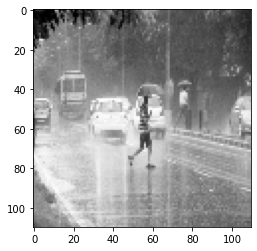

In [77]:
plt.imshow(x[9],cmap="gray")
print(y[9])

In [78]:
x_new = x.reshape(len(x), -1)
print(x_new.shape)
print(y.shape)

(1048, 12100)
(1048,)


In [79]:
print(x.shape)
print(x.ndim)
print(x_new.ndim)

(1048, 110, 110)
3
2


In [80]:
x_new.max()

255

In [81]:
x_train = x_new/255
print(x_train.max())

1.0


In [84]:
model = keras.Sequential([
 keras.layers.Dense(10000, input_shape=(12100,), activation='relu'),
 keras.layers.Dense(5, activation='sigmoid')
])


model.compile(
 optimizer='SGD',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
)

model.fit(x_train, y, epochs=10)

Epoch 1/10
33/33 [==============================] - 16s 267ms/step - loss: 2.8477 - accuracy: 0.3445
Epoch 2/10
33/33 [==============================] - 9s 267ms/step - loss: 1.2298 - accuracy: 0.5057
Epoch 3/10
33/33 [==============================] - 9s 265ms/step - loss: 1.1720 - accuracy: 0.5210
Epoch 4/10
33/33 [==============================] - 9s 267ms/step - loss: 1.1350 - accuracy: 0.5410
Epoch 5/10
33/33 [==============================] - 9s 268ms/step - loss: 1.1103 - accuracy: 0.5763
Epoch 6/10
33/33 [==============================] - 9s 266ms/step - loss: 1.0830 - accuracy: 0.5840
Epoch 7/10
33/33 [==============================] - 9s 270ms/step - loss: 1.0118 - accuracy: 0.6011
Epoch 8/10
33/33 [==============================] - 9s 267ms/step - loss: 1.0241 - accuracy: 0.6135
Epoch 9/10
33/33 [==============================] - 9s 270ms/step - loss: 0.9747 - accuracy: 0.6393
Epoch 10/10
33/33 [==============================] - 9s 269ms/step - loss: 0.9377 - accuracy: 0.666

In [87]:
model = keras.Sequential([
 keras.layers.Dense(10000, input_shape=(12100,), activation='relu'),
 keras.layers.Dense(5, activation='sigmoid')
])


model.compile(
 optimizer='SGD',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
)

model.fit(x_train, y, epochs=30)

Epoch 1/30
33/33 [==============================] - 9s 273ms/step - loss: 2.7367 - accuracy: 0.3597
Epoch 2/30
33/33 [==============================] - 9s 264ms/step - loss: 1.2890 - accuracy: 0.4599
Epoch 3/30
33/33 [==============================] - 9s 267ms/step - loss: 1.1770 - accuracy: 0.5153
Epoch 4/30
33/33 [==============================] - 9s 264ms/step - loss: 1.1526 - accuracy: 0.5372
Epoch 5/30
33/33 [==============================] - 9s 271ms/step - loss: 1.0867 - accuracy: 0.5763
Epoch 6/30
33/33 [==============================] - 9s 265ms/step - loss: 1.0585 - accuracy: 0.6002
Epoch 7/30
33/33 [==============================] - 9s 271ms/step - loss: 1.0383 - accuracy: 0.6126
Epoch 8/30
33/33 [==============================] - 9s 275ms/step - loss: 1.0295 - accuracy: 0.6107
Epoch 9/30
33/33 [==============================] - 9s 266ms/step - loss: 0.9845 - accuracy: 0.6298
Epoch 10/30
33/33 [==============================] - 9s 274ms/step - loss: 0.9617 - accuracy: 0.6546

In [88]:
data_test = pd.read_csv('C:\\Users\\Shridatta\\Desktop\\weather\\Testing_set.csv')
data_test.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [89]:
data_test.shape

(450, 1)

In [90]:
x_test = []
for i in range(len(data_test)):
  img = cv2.resize(cv2.imread(path+"/test/"+data_test.iloc[i, 0], 0), (110, 110))
  x_test.append(img)

In [91]:
print(type(x_test))
x_test = np.array(x_test)
print(type(x_test))

<class 'list'>
<class 'numpy.ndarray'>


In [92]:
x_test_new = x_test.reshape(len(x_test), -1)
print(x_test_new.shape)

(450, 12100)


In [93]:
print(x_test.shape)
print(x_test.ndim)
print(x_test_new.ndim)

(450, 110, 110)
3
2


In [94]:
x_test_new.max()

255

In [95]:
new_x_test = x_test_new/255
print(new_x_test.max())

1.0


In [96]:
y_predicted = model.predict(new_x_test)
y_predicted[0]

15/15 [==============================] - 5s 98ms/step


array([0.86608225, 0.12546267, 0.86975646, 0.51107883, 0.2644619 ],
      dtype=float32)

In [97]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:15]

[2, 1, 1, 3, 2, 2, 3, 1, 4, 2, 4, 0, 0, 0, 1]

In [98]:
decode = {0:'sunrise', 1:'foggy', 2:'cloudy', 3:'rainy', 4:'shine'}

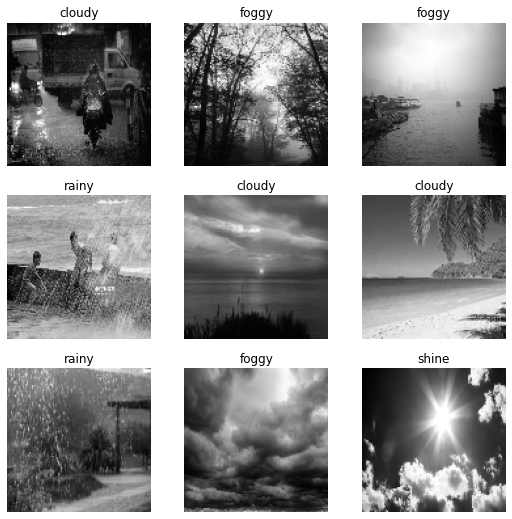

In [99]:
plt.figure(figsize=(9, 9))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(new_x_test[i].reshape(110, 110), cmap='gray')
  plt.title(decode[y_predicted_labels[i]])
  plt.axis('off')

In [101]:
result = []
for i in range(len(data_test)):
  result.append(decode[y_predicted_labels[i]])

In [102]:
data_result = pd.DataFrame({'label': result})
data_result.head()

,label
0,cloudy
1,foggy
2,foggy
3,rainy
4,cloudy


In [103]:
res = pd.DataFrame(result)
res.columns = ["label"]
res.to_csv('submission.csv')         
# files.download('prediction_results_trial_2.csv')